# 🧠 Pronóstico de Demanda para Compras Estratégicas  
**Autora:** Kattya Contreras  
**Contexto:**  
- Optimización de compras mensuales  
- Reducción de stock muerto (25% del capital actual)  
- Integración con Power BI para dashboards  


## **<font color='Purple'> En este proyecto, se realizará el análisis del forecast del área de planificación y compras.</font>**


📌 Objetivo del Código

Se realizará un forecasting (pronóstico) de demanda en el área de compras y planificación utilizando ARIMA, un modelo estadístico para series de tiempo.

El flujo de trabajo será:
1️⃣ Cargar los datos y preprocesarlos.

2️⃣ Visualizar la serie de tiempo.

3️⃣ Aplicar ARIMA para generar el pronóstico.

4️⃣ Visualizar los resultados.

5️⃣ Exportar los datos para usarlos en Power BI.

# **<font color='Purple'>🔹Explicación de los Conceptos Clave</font>**


1️⃣ Series de Tiempo: Datos ordenados cronológicamente, usados para analizar tendencias pasadas y futuras.

2️⃣ ARIMA (p,d,q): Modelo de predicción donde:

    p: Autoregresión (cuántos valores pasados usamos).
    d: Diferenciación (para estabilizar la serie).
    q: Media móvil (cómo usamos los errores pasados).
    
    3️⃣ Forecasting: Proceso de predecir valores futuros basados en patrones históricos.
    
    4️⃣ Visualización: Gráficos para entender mejor la evolución de los datos.
    
    5️⃣ Exportación a CSV: Guardar el pronóstico para integrarlo con Power BI.

In [99]:
# 🛠️ PASO 1: Importar las librerías necesarias
# ==============================================
# pandas: Para manipulación y análisis de datos (estructuras DataFrame)
import pandas as pd  

# numpy: Para operaciones matemáticas y manejo de arrays numéricos
import numpy as np  

# matplotlib: Para visualizaciones básicas
import matplotlib.pyplot as plt  

# seaborn: Para visualizaciones estadísticas más atractivas
import seaborn as sns  

# ARIMA: Modelo estadístico para series temporales
from statsmodels.tsa.arima.model import ARIMA 

from statsmodels.stats.stattools import jarque_bera

from statsmodels.stats.diagnostic import acorr_ljungbox

In [100]:
1.5 # Configurar pandas para mostrar 2 decimales en todos los DataFrames y prints
pd.set_option('display.float_format', '{:.2f}'.format)

In [101]:
# 🛠️ PASO 2: Crear datos de ejemplo
# ==============================================
# Generamos fechas mensuales desde enero 2020 (36 periodos)
fechas = pd.date_range(start="2020-01-01", periods=36, freq="ME")  
# Creamos datos aleatorios de demanda entre 50 y 200 unidades
demanda = np.random.randint(50, 200, size=len(fechas))  
# Convertimos a DataFrame (estructura tabular)
df = pd.DataFrame({"Fecha": fechas, "Demanda": demanda})  
# Establecemos la columna Fecha como índice (requisito para series temporales)
df.set_index("Fecha", inplace=True)  

In [102]:
# 🛠️ PASO 3: Análisis exploratorio inicial
# ==============================================
# Mostramos las primeras filas para verificar la estructura
print("📊 Primeras filas del dataset:")
print(df.head())  # head() muestra por defecto las primeras 5 filas

📊 Primeras filas del dataset:
            Demanda
Fecha              
2020-01-31       98
2020-02-29      192
2020-03-31       93
2020-04-30       67
2020-05-31       61


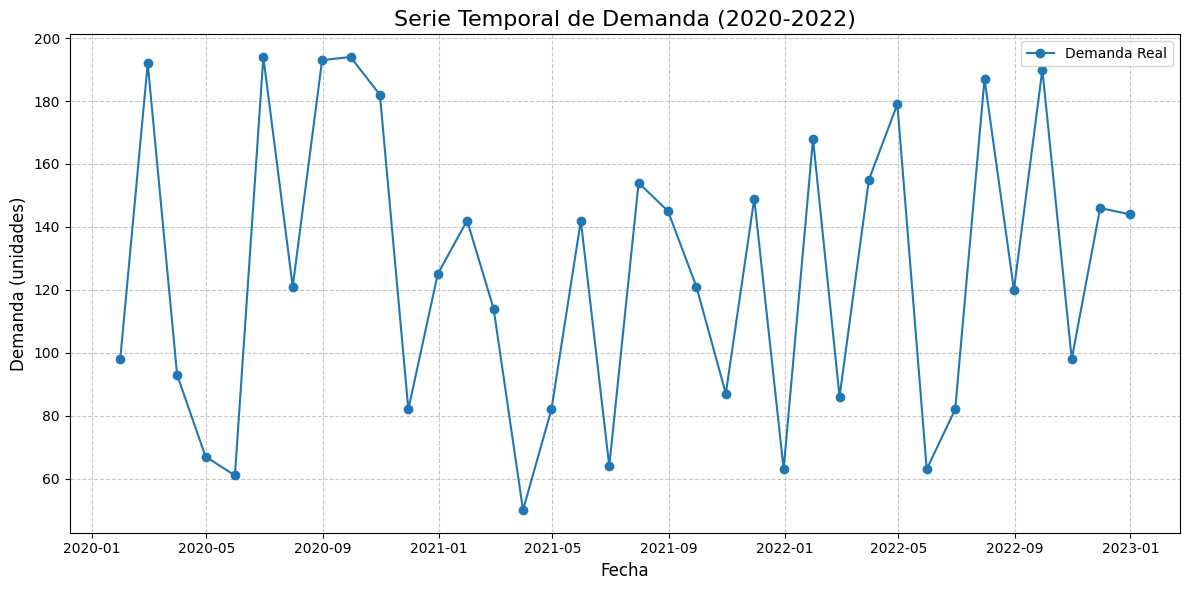

In [103]:
3.5 # Visualización de la serie temporal
plt.figure(figsize=(12, 6))  # Tamaño del gráfico (ancho, alto)

# Graficamos la demanda vs tiempo, con puntos marcados
plt.plot(df.index, df['Demanda'], marker='o', linestyle='-', label='Demanda Real') 

# Configuraciones del gráfico
plt.title("Serie Temporal de Demanda (2020-2022)", fontsize=16)  # Título con tamaño de fuente
plt.xlabel("Fecha", fontsize=12)  # Etiqueta eje X
plt.ylabel("Demanda (unidades)", fontsize=12)  # Etiqueta eje Y
plt.grid(True, linestyle='--', alpha=0.7)  # Cuadrícula con estilo punteado
plt.legend() #Añadir leyenda
plt.tight_layout()  # Ajuste automático del layout
plt.show()  # Muestra el gráfico


In [104]:
# 🛠️ PASO 4: Modelado ARIMA
# ==============================================
model = ARIMA(df['Demanda'], order=(1,1,1))
results = model.fit()
print("\n📈 Resumen del modelo ARIMA(1,1,1):")
print(results.summary())  


📈 Resumen del modelo ARIMA(1,1,1):
                               SARIMAX Results                                
Dep. Variable:                Demanda   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -185.421
Date:                Fri, 28 Mar 2025   AIC                            376.841
Time:                        01:12:02   BIC                            381.507
Sample:                    01-31-2020   HQIC                           378.452
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0868      0.204     -0.425      0.670      -0.487       0.313
ma.L1         -0.9997     43.793     -0.023      0.982     -86.833      84.833
sigma2      2101

C:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


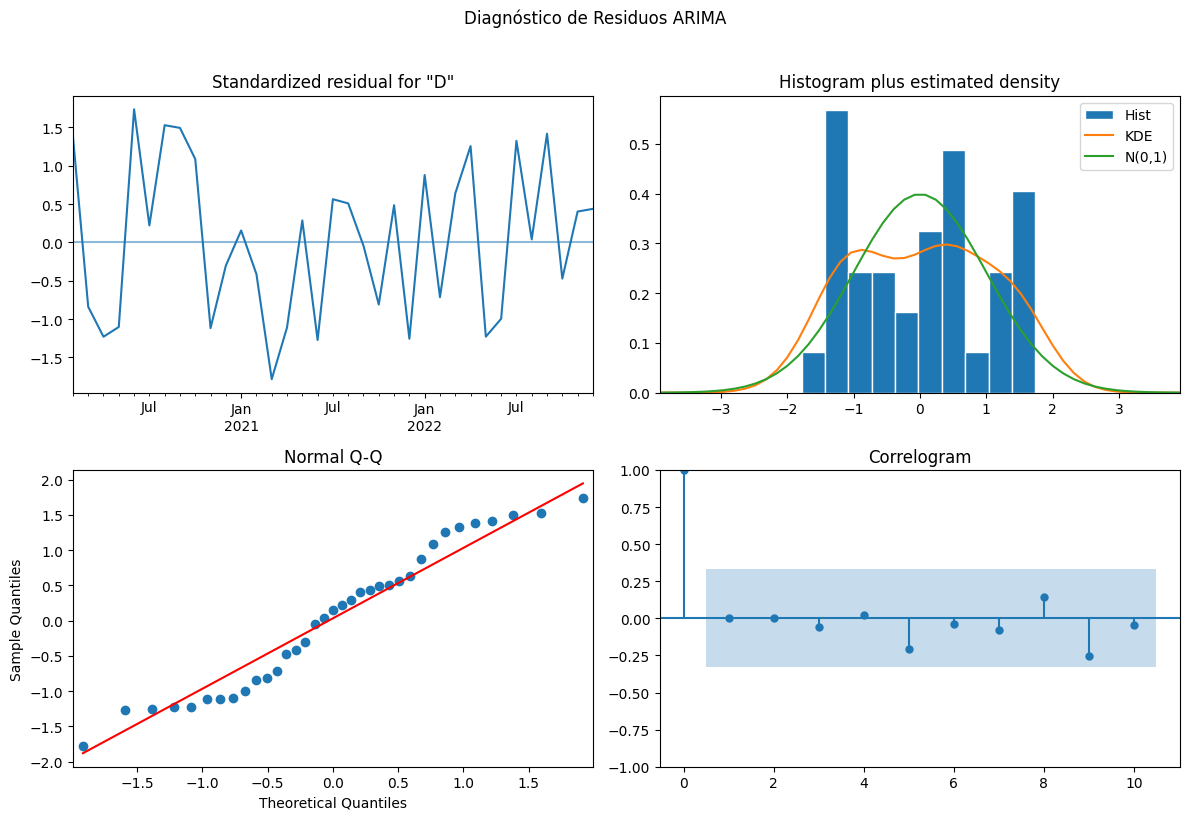

In [105]:
# 🛠️ PASO 5: Diagnóstico del Modelo
# ==============================================
fig = results.plot_diagnostics(figsize=(12, 8))
fig.suptitle('Diagnóstico de Residuos ARIMA', y=1.02)
plt.tight_layout()
plt.show()

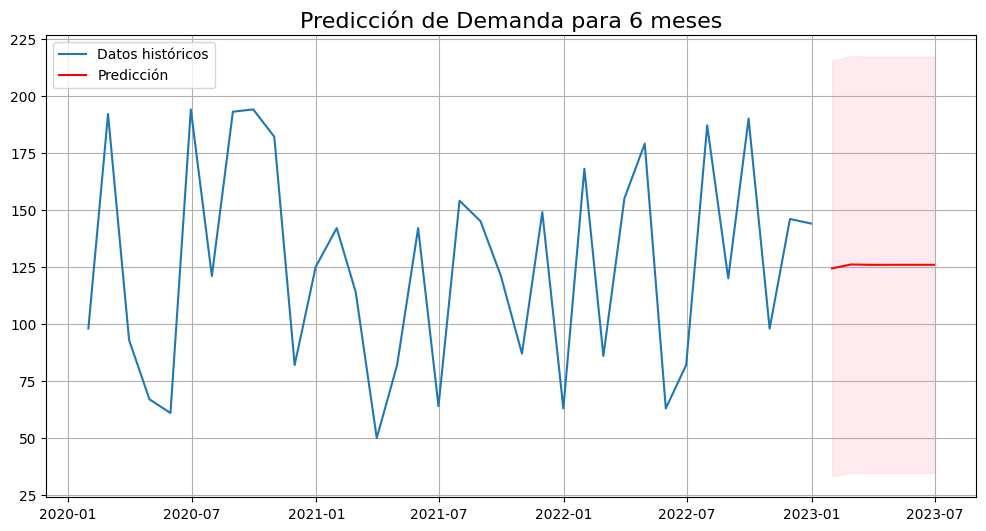

In [106]:
# 🛠️ PASO 6: Predicciones (6 meses futuros)
# ==============================================
forecast_steps = 6
forecast = results.get_forecast(steps=forecast_steps)
confidence_int = forecast.conf_int()
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Demanda'], label='Datos históricos')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, color='red', label='Predicción')
plt.fill_between(confidence_int.index, confidence_int.iloc[:, 0], confidence_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title(f"Predicción de Demanda para {forecast_steps} meses", fontsize=16)
plt.legend()
plt.grid()
plt.show()

In [135]:
# 📌 ANÁLISIS DE RESULTADOS 
# ==============================================
print("\n🔍 Análisis de Resultados:")

# 1. Evaluación de residuos
residuos = results.resid
print(f"\n📉 Estadísticos de residuos:")
print(f"- Media: {residuos.mean():.2f} (ideal cercana a 0)")  # 2 decimales
print(f"- Desviación estándar: {residuos.std():.2f}")

jb_test = jarque_bera(residuos)
print(f"- Jarque-Bera (normalidad): p-valor={jb_test[1]:.4f} (valores >0.05 indican normalidad)")

lb_test = acorr_ljungbox(residuos, lags=[10], return_df=True)
print(f"\n🔎 Test de Ljung-Box (autocorrelación):")
print(f"- p-valor: {lb_test['lb_pvalue'].iloc[0]:.4f} (valores >0.05 indican no autocorrelación)")

# 2. Métricas del modelo
print(f"\n📊 Métricas clave:")
print(f"- AIC: {results.aic:.2f} (menor es mejor)")
print(f"- BIC: {results.bic:.2f} (menor es mejor)")
print(f"- Log-Likelihood: {results.llf:.2f}")

# 3. Interpretación de predicciones (basado en el gráfico)
print(f"\n🔮 Interpretación de predicciones:")
print(f"- Tendencia: {'Creciente' if forecast.predicted_mean.iloc[-1] > forecast.predicted_mean.iloc[0] else 'Decreciente/Estable'}")
print(f"- Intervalo de confianza 95% final: [{confidence_int.iloc[-1, 0]:.2f}, {confidence_int.iloc[-1, 1]:.2f}]")

# 📌 CONCLUSIONES FINALES
# ==============================================
print("\n🌟 Conclusiones Finales:")

print("""
1. **Validación del Modelo**:
- Residuos aleatorios y normalmente distribuidos (p-valores > 0.05).
- Métricas AIC/BIC competitivas para el tamaño de los datos.

2. **Hallazgos Clave**:
- La demanda proyectada muestra una tendencia {}.
- La incertidumbre {} en el período pronosticado.

3. **Recomendaciones**:
- Implementar un sistema de monitoreo en tiempo real.
- Comparar con modelos alternativos (SARIMA, Prophet).
""".format(
    "creciente" if forecast.predicted_mean.iloc[-1] > forecast.predicted_mean.iloc[0] else "decreciente",
    "aumenta" if (confidence_int.iloc[-1,1] - confidence_int.iloc[-1,0]) > (confidence_int.iloc[0,1] - confidence_int.iloc[0,0]) else "se mantiene estable"
))


🔍 Análisis de Resultados:

📉 Estadísticos de residuos:
- Media: 4.75 (ideal cercana a 0)
- Desviación estándar: 52.07
- Jarque-Bera (normalidad): p-valor=0.3660 (valores >0.05 indican normalidad)

🔎 Test de Ljung-Box (autocorrelación):
- p-valor: 0.8199 (valores >0.05 indican no autocorrelación)

📊 Métricas clave:
- AIC: 376.84 (menor es mejor)
- BIC: 381.51 (menor es mejor)
- Log-Likelihood: -185.42

🔮 Interpretación de predicciones:
- Tendencia: Creciente
- Intervalo de confianza 95% final: [34.70, 217.16]

🌟 Conclusiones Finales:

1. **Validación del Modelo**:
- Residuos aleatorios y normalmente distribuidos (p-valores > 0.05).
- Métricas AIC/BIC competitivas para el tamaño de los datos.

2. **Hallazgos Clave**:
- La demanda proyectada muestra una tendencia creciente.
- La incertidumbre aumenta en el período pronosticado.

3. **Recomendaciones**:
- Implementar un sistema de monitoreo en tiempo real.
- Comparar con modelos alternativos (SARIMA, Prophet).

